# 聚类


k-means在图片上的应用

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpig

## 加载图片


查看一下图片的尺寸

In [2]:
image = mpig.imread('./doll.jpg')
image.shape

(1440, 1080, 3)

显示图片

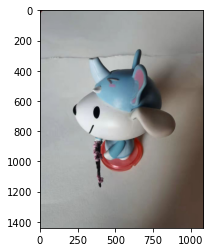

In [3]:
plt.imshow(image , cmap=plt.cm.binary)
plt.show()

## 把图片拉平


图片是一个(1440, 1080, 3)的rgb图片


为了方便计算机识别，把图片变成(1440*1080, 3)的数据


也就是说，把二维矩阵变成一纬度
> 实际上是三维变二维，因为rgb还是一维

In [4]:
flat = image.reshape(1440*1080, 3)
flat

array([[98, 17, 14],
       [98, 14, 12],
       [99, 11,  9],
       ...,
       [84, 64, 53],
       [84, 64, 53],
       [84, 64, 53]], dtype=uint8)

## 聚类


聚两个类

In [5]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(flat)
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

## 查看聚类结果


把拉平的矩阵还原成之前的二维矩阵

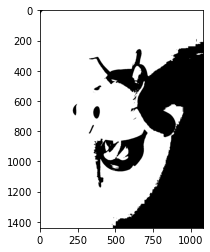

In [6]:
grey = np.array(kmeans.labels_)
im = grey.reshape(1440, 1080, 1)
plt.imshow(im , cmap=plt.cm.binary)
plt.show()

## 改变一下聚类数量


比如3个，或者更多

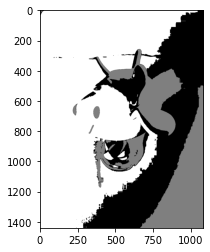

In [7]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(flat)
plt.imshow(np.array(kmeans.labels_).reshape(1440, 1080, 1) , cmap=plt.cm.binary)
plt.show()

## 随机颜色


更多颜色时候，灰度可读性差，我们使用rgb


随机出来10种颜色，然后分类

In [8]:
from random import seed, randint

seed(1)
labels = [[randint(0,255),randint(0,255),randint(0,255)] for x in range(10)]
labels

[[68, 32, 130],
 [60, 253, 230],
 [241, 194, 107],
 [48, 249, 14],
 [199, 221, 1],
 [228, 136, 117],
 [52, 162, 15],
 [11, 13, 4],
 [195, 110, 216],
 [14, 113, 224]]

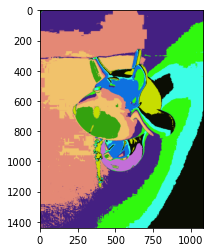

In [9]:
kmeans = KMeans(n_clusters=10, random_state=1)
kmeans.fit(flat)
rgb = [labels[x] for x in kmeans.labels_]
plt.imshow(np.array(rgb).reshape(1440, 1080, 3) , cmap=plt.cm.binary)
plt.show()